# Importing Libraries

In [1]:
import glob
import os
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
os.environ['Directory'] = "/Users/tarun/NLP_IIITN/" 

# Preprocessing Dataset to Generate Language Model

In [3]:
filename_list = list()
for filename in glob.glob('dataset_for_vocab/*/*/*.txt'):
  file = os.path.join(os.getcwd(), filename)
  filename_list.append(file)

In [4]:
filename_list[:5]

['/Users/tarun/NLP_IIITN/dataset_for_vocab/valid/valid/36964.txt',
 '/Users/tarun/NLP_IIITN/dataset_for_vocab/valid/valid/18441.txt',
 '/Users/tarun/NLP_IIITN/dataset_for_vocab/valid/valid/5235.txt',
 '/Users/tarun/NLP_IIITN/dataset_for_vocab/valid/valid/22911.txt',
 '/Users/tarun/NLP_IIITN/dataset_for_vocab/valid/valid/8711.txt']

In [5]:
filename_list[-5:]

['/Users/tarun/NLP_IIITN/dataset_for_vocab/train/train/19746.txt',
 '/Users/tarun/NLP_IIITN/dataset_for_vocab/train/train/16475.txt',
 '/Users/tarun/NLP_IIITN/dataset_for_vocab/train/train/40633.txt',
 '/Users/tarun/NLP_IIITN/dataset_for_vocab/train/train/29685.txt',
 '/Users/tarun/NLP_IIITN/dataset_for_vocab/train/train/38950.txt']

In [6]:
stopwords = [
  "ਦੇ", "0", "ਵਿੱਚ", "ਦਾ", "ਅਤੇ", "ਦੀ", "ਇੱਕ", "ਨੂੰ", "ਹੈ", "ਤੋਂ", "ਇਸ", "ਇਹ",
  "ਨੇ", "ਤੇ", "ਨਾਲ", "1", "ਲਈ", "ਵੀ", "ਸੀ", "ਵਿਚ", "ਕਿ", "ਜੋ", "ਉਹ", "ਉਸ",
  "ਹਨ", "ਜਾਂਦਾ", "ਕੀਤਾ", "2", "ਗਿਆ", "ਹੀ", "ਕੇ", "ਜਾਂ", "ਦੀਆਂ", "ਜਿਸ", "ਕਰਨ",
  "ਹੋ", "ਕਰ", "ਆਪਣੇ", "ਕੀਤੀ", "ਤੌਰ", "ਬਾਅਦ", "ਨਹੀਂ", "ਭਾਰਤੀ", "ਪਿੰਡ", "3",
  "ਸਿੰਘ", "ਉੱਤੇ", "ਸਾਲ", "।", "ਪੰਜਾਬ", "ਸਭ", "ਭਾਰਤ", "ਉਨ੍ਹਾਂ", "ਹੁੰਦਾ", "ਤੱਕ",
  "ਇਕ", "ਹੋਇਆ", "ਜਨਮ", "ਬਹੁਤ", "ਪਰ", "ਦੁਆਰਾ", "ਰੂਪ", "4", "ਹੋਰ", "ਕੰਮ", "ਆਪਣੀ",
  "ਤਾਂ", "ਸਮੇਂ", "ਪੰਜਾਬੀ", "ਗਈ", "ਦਿੱਤਾ", "ਦੋ", "ਕਿਸੇ", "ਕਈ", "ਜਾ", "ਵਾਲੇ",
  "ਸ਼ੁਰੂ", "5", "ਉਸਨੇ", "ਕਿਹਾ", "ਹੋਣ", "ਲੋਕ", "ਜਾਂਦੀ", "ਵਿੱਚੋਂ", "ਨਾਮ", "ਜਦੋਂ",
  "ਪਹਿਲਾਂ", "ਕਰਦਾ", "ਹੁੰਦੀ", "ਹੋਏ", "ਸਨ", "ਵਜੋਂ", "ਰਾਜ", "ਮੁੱਖ", "ਕਰਦੇ", "ਕੁਝ",
  "ਸਾਰੇ", "ਹੁੰਦੇ", "ਸ਼ਹਿਰ", "ਭਾਸ਼ਾ", "6", "ਹੋਈ", "ਅਨੁਸਾਰ", "ਸਕਦਾ", "ਆਮ", "ਵੱਖ",
  "ਕੋਈ", "ਵਾਰ", "ਗਏ", "ਖੇਤਰ", "ਜੀ", "ਕਾਰਨ", "ਕਰਕੇ", "ਜਿਵੇਂ", "ਜ਼ਿਲ੍ਹੇ",
  "ਲੋਕਾਂ", "ਚ", "ਸਾਹਿਤ", "ਸਦੀ", "ਬਾਰੇ", "ਜਾਂਦੇ", "ਵਾਲਾ", "ਜਾਣ", "ਪਹਿਲੀ",
  "ਪ੍ਰਾਪਤ", "ਰਿਹਾ", "ਵਾਲੀ", "ਨਾਂ", "ਦੌਰਾਨ", "ਤਰ੍ਹਾਂ", "7", "ਯੂਨੀਵਰਸਿਟੀ", "ਨਾ",
  "ਏ", "ਤਿੰਨ", "ਇਨ੍ਹਾਂ", "ਗੁਰੂ", "ਇਸਨੂੰ", "ਇਹਨਾਂ", "ਪਿਤਾ", "ਲਿਆ", "ਸ਼ਾਮਲ",
  "ਸ਼ਬਦ", "ਅੰਗਰੇਜ਼ੀ", "ਉਸਨੂੰ", "ਉਹਨਾਂ", "8", "ਸਥਿਤ", "ਫਿਰ", "ਜੀਵਨ", "ਸਕੂਲ",
  "ਹੁਣ", "ਦਿਨ", "ਕੀਤੇ", "ਆਦਿ", "ਵੱਧ", "ਲੈ", "ਘਰ", "ਵੱਲ", "ਦੇਸ਼", "ਵਲੋਂ", "ਬਣ",
  "ਵੀਂ", "ਫਿਲਮ", "ਉਮਰ", "ਬਲਾਕ", "ਰਹੇ", "10", "ਸਾਹਿਬ", "ਕਰਦੀ", "ਹਰ", "ਪੈਦਾ",
  "ਘੱਟ", "9", "ਲੇਖਕ", "ਹਿੱਸਾ", "ਫ਼ਿਲਮ", "ਮੌਤ", "ਜਿੱਥੇ", "ਵੱਡਾ", "ਵਿਖੇ", "ਆਪਣਾ",
  "ਪਹਿਲਾ", "ਵਰਤੋਂ", "ਆਪ", "ਕਰਨਾ", "ਵਿਆਹ", "ਰਹੀ", "ਰਾਹੀਂ", "ਦਿੱਤੀ", "ਉਸਦੇ",
  "ਪਰਿਵਾਰ", "ਆ", "ਦੂਜੇ", "ਅਮਰੀਕਾ", "ਮੰਨਿਆ", "ਇਸਦੇ", "ਈ", "ਕਾਲਜ", "ਸਰਕਾਰ",
  "ਇੱਥੇ", "ਪਾਕਿਸਤਾਨ", "ਸ਼ਾਮਿਲ", "ਵਿਗਿਆਨ", "ਉਸਦੀ", "ਪੇਸ਼", "ਕਿਉਂਕਿ", "ਪਹਿਲੇ",
  "ਧਰਮ", "ਮਸ਼ਹੂਰ", "ਅੰਦਰ", "ਵਿਚੋਂ", "ਜਿਨ੍ਹਾਂ", "ਜਾਣਿਆ", "ਪਾਣੀ", "ਇਲਾਵਾ", "ਅਰਥ",
  "ਚਾਰ", "ਪ੍ਰਸਿੱਧ", "ਨਾਵਲ", "ਵੱਡੇ", "ਵੱਲੋਂ", "ਕਹਾਣੀ", "ਵਿਸ਼ਵ", "ਮੂਲ", "ਅਮਰੀਕੀ",
  "ਸਥਾਨ", "ਇਤਿਹਾਸ", "ਕੁੱਝ", "ਵਿਕਾਸ", "ਉੱਤਰ", "ਸਿੱਖਿਆ", "ਹਿੰਦੀ", "ਪ੍ਰਮੁੱਖ",
  "ਰਚਨਾ", "ਬਣਾਇਆ", "ਵਿਸ਼ੇਸ਼", "ਡਾ", "ਉੱਪਰ", "ਪੱਛਮੀ", "ਦੇਣ", "ਇਸਦਾ", "ਸਕਦੇ",
  "ਰੱਖਿਆ", "ਕਵੀ", "ਦਿੱਲੀ", "ਵੱਡੀ", "ਭੂਮਿਕਾ", "ਸਮਾਜ", "ਕਾਵਿ", "ਕੀ", "ਕੋਲ", "ਦ",
  "ਗੱਲ", "ਸੰਸਾਰ", "ਭਾਗ", "ਆਈ", "ਦੱਖਣ", "ਅੱਜ", "ਸਿੱਖ", "ਕਹਿੰਦੇ", "ਸੰਗੀਤ",
  "ਕਿਲੋਮੀਟਰ", "ਜਿਹਨਾਂ", "ਸਭਾ", "ਜਿਸਦਾ", "ਜਨਵਰੀ", "ਕਵਿਤਾ", "ਮੈਂਬਰ", "ਲਿਖਿਆ",
  "ਮਾਂ", "ਕਲਾ", "ਪੰਜ", "ਥਾਂ", "ਹੇਠ", "ਜਿਆਦਾ", "ਵਰਤਿਆ", "ਮਾਰਚ", "ਡੀ", "ਅਕਤੂਬਰ",
  "ਤਕ", "ਨਾਟਕ", "ਬੀ", "ਖਾਸ", "ਇਸੇ", "ਆਧੁਨਿਕ", "ਅਗਸਤ", "ਤਿਆਰ", "ਮਾਤਾ", "ਬਣਾਉਣ",
  "ਨਵੰਬਰ", "ਵਿਅਕਤੀ", "ਦੱਖਣੀ", "ਦਸੰਬਰ", "ਆਫ", "ਗੀਤ", "ਗਿਣਤੀ", "ਕਾਲ", "ਖੋਜ",
  "ਸਾਲਾਂ", "ਪੂਰੀ", "ਸਮਾਂ", "ਜ਼ਿਆਦਾ", "ਇਸਦੀ", "ਸਕਦੀ", "ਵਿਚਕਾਰ", "ਰਾਜਧਾਨੀ",
  "ਉਸਦਾ", "ਜੁਲਾਈ", "ਜੂਨ", "ਅਧੀਨ", "ਸਥਾਪਨਾ", "ਸੇਵਾ", "ਭਾਵ", "ਵਰਗ", "ਛੋਟੇ",
  "ਦਿੰਦਾ", "ਸਮਾਜਿਕ", "ਹੁੰਦੀਆਂ", "ਟੀਮ", "ਔਰਤਾਂ", "ਅਕਸਰ", "ਪ੍ਰਕਾਸ਼ਿਤ", "ਉਰਦੂ",
  "ਰੰਗ", "ਪਾਰਟੀ", "ਬਣਾ", "ਪ੍ਰਭਾਵ", "ਸ਼ੁਰੂਆਤ", "ਲਗਭਗ", "ਮਈ", "ਸਿਰਫ", "ਨੇੜੇ",
  "ਜਿਸਨੂੰ", "ਹਾਲਾਂਕਿ", "ਦੂਰ", "ਸਤੰਬਰ", "ਕਿਤਾਬ", "ਕਦੇ", "ਉੱਤਰੀ", "ਪ੍ਰਕਾਰ",
  "ਇਸਨੇ", "ਪ੍ਰਦੇਸ਼", "ਅੱਗੇ", "ਸੰਯੁਕਤ", "ਪੜ੍ਹਾਈ", "ਵਧੇਰੇ", "ਨਾਲ਼", "ਮਨੁੱਖ",
  "ਬਾਕੀ", "ਪ੍ਰਧਾਨ", "ਦੂਜੀ", "ਕੁੱਲ", "ਆਫ਼", "ਅਧਿਐਨ", "ਰਾਸ਼ਟਰੀ", "ਪੁੱਤਰ",
  "ਅੰਤਰਰਾਸ਼ਟਰੀ", "ਧਰਤੀ", "ਕੇਂਦਰ", "ਦੇਸ਼ਾਂ", "ਮੱਧ", "ਜ਼ਿਲ੍ਹਾ", "ਸਾਰੀਆਂ", "ਪੱਧਰ",
  "ਹੋਵੇ", "ਜੇ", "ਭਾਈ", "ਰਹਿਣ", "ਪੁਰਸਕਾਰ", "ਸਭਿਆਚਾਰ", "ਪਤਾ", "ਪਾਸੇ", "ਨਵੇਂ",
  "ਕੰਪਨੀ", "ਬਾਹਰ", "ਵੇਲੇ", "ਸੰਨ", "ਪੂਰਬੀ", "ਵਿਚਾਰ", "ਕਾਰਜ", "ਪੀ", "ਮਹੱਤਵਪੂਰਨ",
  "ਦੁਨੀਆਂ", "ਧਾਰਮਿਕ", "ਮਨੁੱਖੀ", "ਸਮੂਹ", "ਅਜਿਹੇ", "ਲਾਲ", "ਦੂਜਾ", "ਭਰਾ", "ਸ੍ਰੀ",
  "ਅੰਤ", "ਜਾਂਦੀਆਂ", "ਸ਼ਾਹ", "ਰਹਿੰਦੇ", "ਮਹਾਨ", "ਚੀਨ", "ਮੀਟਰ", "ਵਰਗੇ", "ਨਾਲੋਂ",
  "ਹਾਸਲ", "ਕਿਸਮ", "ਅਜਿਹਾ", "ਬਣਿਆ", "ਭਰ", "ਛੱਡ", "ਲੈਣ", "ਹਿੱਸੇ", "ਟੀ", "ਲਿਖੇ",
  "ਮਿਲ", "ਮੌਜੂਦ", "ਦਿੱਤੇ", "ਵਾਸਤੇ", "ਵਾਲੀਆਂ", "ਵਧੀਆ", "ਰੂਸੀ", "ਜਾਰੀ", "ਸਰਕਾਰੀ",
  "ਡਿਗਰੀ", "ਪੱਛਮ", "ਲੜਾਈ", "ਭਾਸ਼ਾਵਾਂ", "ਰਾਜਾ", "ਜਲੰਧਰ", "ਹਿੰਦੂ", "ਔਰਤ", "ਜੰਗ",
  "ਬਾਬਾ", "ਬੱਚਿਆਂ", "ਮੰਤਰੀ", "ਪਟਿਆਲਾ", "ਵਾਂਗ", "ਆਉਣ", "ਭਾਵੇਂ", "ਕੇਵਲ", "ਐਸ",
  "ਪ੍ਰਾਚੀਨ", "ਰਹਿੰਦਾ", "ਬੋਲੀ", "ਅਵਾਰਡ", "ਨਗਰ", "ਖੇਡਾਂ", "ਫਿਲਮਾਂ", "ਬੱਚੇ",
  "ਕੌਰ", "ਤੋ", "ਪ੍ਰਤੀ", "ਕੁਆਂਟਮ", "ਅਬਾਦੀ", "ਪੁਸਤਕ", "ਐਮ", "ਰਾਮ", "ਖੇਤਰਾਂ",
  "ਫਰਵਰੀ", "ਕ੍ਰਿਕਟ", "ਪੈਂਦਾ", "ਇਤਿਹਾਸਕ", "ਲੱਗ", "ਬ੍ਰਿਟਿਸ਼", "ਆਇਆ", "ਮਿਲਦਾ"
]
print(len(stopwords))

463


In [7]:
sentences = list()
for filename in filename_list[:]:
    with open(filename, 'r') as file:
      sentence = file.read()
      for word in stopwords:
        token = " " + word +" "
        sentence.replace(token, " ")
        sentence.replace("  ", " ")
      sentences.append(sentence)

In [8]:
print(len(sentences))

44547


In [9]:
print(sentences[0])

ਯੇਰਵਾਨ ਆਰਮੇਨੀਆ ਦਾ ਇੱਕ ਪ੍ਰਾਂਤ ਹੈ। ਇਸ ਦੀ ਜਨਸੰਖਿਆ 1,091,235 ਹੈ। ਇਹ ਆਬਾਦੀ ਦੇਸ਼ ਦੀ ਕੁਲ ਆਬਾਦੀ ਦਾ 36.3 % ਹੈ। ਇੱਥੇ ਦੀ ਜਨਸੰਖਿਆ ਘਣਤਾ 5, 196 . 4 / km² ਹੈ। ਇੱਥੇ ਦੀ ਰਾਜਧਾਨੀ ਕੋਈ ਨਹੀਂ ਹੈ।



# Configuration for Language Model

In [10]:
vocab_size = 10000
embedding_dim = 100
max_length = 1000 
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

# Building a Punjabi Vocabulary 

In [11]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [12]:
print(len(word_index))

260134


In [13]:
list(word_index.items())[:10]

[('<OOV>', 1),
 ('ਦੇ', 2),
 ('ਵਿੱਚ', 3),
 ('ਦੀ', 4),
 ('ਅਤੇ', 5),
 ('ਹੈ।', 6),
 ('ਹੈ', 7),
 ('ਦਾ', 8),
 ('ਨੂੰ', 9),
 ('ਇੱਕ', 10)]

# Preprocessing Dataset for Classification task 

In [14]:
train_sentences = list()
train_labels = list ()
with open("dataset_for_classification/train.csv", 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter = ',')
  next(reader)
  for row in reader:
    label = row[1]
    train_labels.append(label)
    sentence = row[0]
    for word in stopwords:
      token = " " + word +" "
      sentence.replace(token, " ")
      sentence.replace("  ", " ")
    train_sentences.append(sentence)

In [15]:
print(train_sentences[0])

 ਮਾਇਆਵਤੀ ਅਤੇ ਮੁਲਾਇਮ ਸਿੰਘ ਯਾਦਵ ਨੂੰ ਦੁਸ਼ਮਣ ਬਣਾਉਣ ਵਾਲਾ ਗੈਸਟ ਹਾਊਸ ਕਾਂਡ  ਭਰਤ ਸ਼ਰਮਾ ਬੀਬੀਸੀ ਪੱਤਰਕਾਰ       13 ਜਨਵਰੀ 2019                                              ਈਮੇਲ                                                 ਸਾਂਝਾ ਕਰੋ                                                 ਈਮੇਲ  ਈਮੇਲ    ਲਿੰਕ ਨੂੰ ਕਾਪੀ ਕਰੋ  https://www.bbc.com/punjabi/india-46850353  ਸਾਂਝਾ ਕਰਨ ਬਾਰੇ ਹੋਰ ਪੜ੍ਹੋ   ਸਾਂਝਾ ਕਰਨ ਵਾਲੇ ਪੈਨਲ ਨੂੰ ਬੰਦ ਕਰੋ              Image copyright Getty Images  ਉੱਤਰ ਪ੍ਰਦੇਸ਼ ਦੀ ਰਾਜਧਾਨੀ ਲਖਨਊ ਵਿੱਚ ਬਹੁਜਨ ਸਮਾਜ ਪਾਰਟੀ ਅਤੇ ਅਤੇ ਸਮਾਜਵਾਦੀ ਪਾਰਟੀ ਨੇ ਸਮਝੌਤੇ ਦਾ ਐਲਾਨ ਕੀਤਾ। ਬਸਪਾ ਦੀ ਸੁਪਰੀਮੋ ਮਾਇਆਵਤੀ ਅਤੇ ਸਪਾ ਮੁਖੀ ਅਖਿਲੇਸ਼ ਯਾਦਵ ਨੇ ਦੱਸਿਆ ਕਿ ਇਹ ਸਿਰਫ 2019 ਦੀਆਂ ਲੋਕ ਸਭਾ ਚੋਣਾਂ ਲਈ ਨਹੀਂ ਹੈ ਸਗੋਂ ਲੰਬੇ ਸਮੇਂ ਤੱਕ ਚੱਲੇਗਾ।ਦੋਹਾਂ ਧਿਰਾਂ ਨੇ ਕਿਹਾ ਕਿ ਉਹ ਲੋਕ ਸਭਾ ਚੋਣਾਂ ਵਿੱਚ ਸੂਬੇ ਦੀਆਂ 38-38 ਸੀਟਾਂ 'ਤੇ ਚੋਣ ਲੜਨਗੀਆਂ। ਰਾਇਬਰੇਲੀ ਅਤੇ ਅਮੇਠੀ ਸੀਟ ਕਾਂਗਰਸ ਲਈ ਛੱਡ ਦਿੱਤੀ ਗਈ ਹੈ ਅਤੇ ਬਾਕੀ ਦੋ ਸੀਟਾਂ ਸਹਿਯੋਗੀਆਂ ਲਈ ਛੱਡ ਦਿੱਤੀਆਂ ਗਈਆਂ ਹਨ।ਪ੍ਰੈਸ ਕਾਨਫਰੰਸ ਨੂੰ ਸੰਬੋਧਨ ਕਰਦਿਆਂ ਮਾਇਆਵਤੀ ਗੈਸਟ ਹਾਊਸ ਕਾਂਡ ਦਾ ਜ਼ਿਕਰ ਕਰਨਾ ਨਹੀਂ ਭੁੱਲੇ ਅਤੇ ਉਨ੍ਹਾਂ ਕਿਹਾ ਕਿ ਦਹਿਸ਼ਤ ਅਤੇ ਜਨਹਿਤ ਵਿੱਚ ਉਨ੍ਹਾਂ ਨੇ ਇਸ ਗਠਬੰਧ

In [16]:
print(train_labels[0])

True


In [17]:
val_sentences = list()
val_labels = list ()
with open("dataset_for_classification/valid.csv", 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter = ',')
  next(reader)
  for row in reader:
    label = row[1]
    val_labels.append(label)
    sentence = row[0]
    for word in stopwords:
      token = " " + word +" "
      sentence.replace(token, " ")
      sentence.replace("  ", " ")
    val_sentences.append(sentence)

In [18]:
print(val_sentences[0])

 ਹਾਈ ਹੀਲ ਦੀ ਜੁੱਤੀ ਕਦੋਂ, ਕਿੱਥੇ ਅਤੇ ਕਿਵੇਂ ਆਈ ਪ੍ਰਚਲਨ ਵਿੱਚ   ਭੂਮਿਕਾ ਰਾਏ ਬੀਬੀਸੀ ਪੱਤਰਕਾਰ       18 ਮਈ 2018                                              ਈਮੇਲ                                                 ਸਾਂਝਾ ਕਰੋ                                                 ਈਮੇਲ  ਈਮੇਲ    ਲਿੰਕ ਨੂੰ ਕਾਪੀ ਕਰੋ  https://www.bbc.com/punjabi/international-44141912  ਸਾਂਝਾ ਕਰਨ ਬਾਰੇ ਹੋਰ ਪੜ੍ਹੋ   ਸਾਂਝਾ ਕਰਨ ਵਾਲੇ ਪੈਨਲ ਨੂੰ ਬੰਦ ਕਰੋ              Image copyright Getty Images  "ਜੇ ਤੁਸੀਂ ਮਰਦਾਂ ਨੂੰ ਉੱਚੀ-ਅੱਡੀ ਅਤੇ ਉੱਚੀ ਡਰੈੱਸ ਪਾਉਣ ਬਾਰੇ ਸਵਾਲ ਨਹੀਂ ਪੁੱਛਦੇ ਤਾਂ ਤੁਸੀਂ ਮੈਨੂੰ ਵੀ ਨਹੀਂ ਪੁੱਛ ਸਕਦੇ।"ਟਵਾਈਲਾਈਟ ਸਾਗਾ (ਉਹੀ ਫਿਲਮ ਜਿਸ ਵਿੱਚ ਭੇੜੀਏ ਇਨਸਾਨਾਂ ਦਾ ਖ਼ੂਨ ਪੀਂਦੇ ਹਨ) ਦੀ ਨਾਇਕਾ ਕ੍ਰਿਸਟੀਨ ਸਟੀਵਰਟ ਮੰਗਲਵਾਰ ਨੂੰ ਜਿਊਰੀ ਮੈਂਬਰ ਵਜੋਂ ਕਾਨਸ ਫਿਲਮ ਮੇਲੇ ਵਿੱਚ ਪਹੁੰਚੇ ਸਨ। ਰੈੱਡ ਕਾਰਪੈਟ 'ਤੇ ਤੁਰਦਿਆਂ ਉਨ੍ਹਾਂ ਨੇ ਚਾਂਦੀ ਰੰਗੀ ਪੁਸ਼ਾਕ ਅਤੇ ਕਾਲੇ ਉੱਚੀ-ਅੱਡੀ ਦੇ ਸੈਂਡਲ ਪਾਏ ਹੋਏ ਸਨ। ਕੁਝ ਦੂਰ ਤੁਰਨ ਮਗਰੋਂ ਉਨ੍ਹਾਂ ਨੇ ਉੱਚੀ-ਅੱਡੀ ਦੇ ਸੈਂਡਲ ਲਾਹ ਦਿੱਤੇ।ਯੇਦੂਰੱਪਾ ਬਣੇ ਕਰਨਾਟਕ ਦੇ ਸੀਐੱਮ, ਧਰਨੇ 'ਤੇ ਕਾਂਗਰਸਰਮਜ਼ਾਨ ਬਾਰੇ 10 ਜ਼ਰੂਰੀ ਗੱਲਾਂ ਤੁਹਾਨੂੰ ਪਤਾ ਹਨ?ਟਰੰਪ ਨੇ ਮੰਨਿਆ ਪੋਰਨ ਸਟਾਰ ਨੂੰ ਦਿੱਤੇ ਪੈਸੇਅਜਿਹਾ ਉਨ੍ਹਾਂ ਨੇ ਕਾਨਸ ਫਿਲ

In [19]:
print(val_labels[2])

True


In [20]:
print(len(train_sentences))
print(len(train_labels))
print(len(val_sentences))
print(len(val_labels))

627
627
157
157


# Tokenizing dataset for Classification

In [21]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding = padding_type, maxlen=max_length)

In [22]:
validation_sequences = tokenizer.texts_to_sequences(val_sentences)
validation_padded = pad_sequences(validation_sequences, padding = padding_type, maxlen= max_length)

In [23]:
print(len(validation_sequences))
print(validation_padded.shape)

157
(157, 1000)


In [24]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(val_labels))

# print(training_label_seq[0])
# print(training_label_seq[1])
# print(training_label_seq[2])
# print(training_label_seq.shape)

# print(validation_label_seq[0])
# print(validation_label_seq[1])
# print(validation_label_seq[2])
# print(validation_label_seq.shape)

# Training a Neural network to Classify and simultaneiously Training for Embeddings

In [25]:
model = tf.keras.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         1000000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
Total params: 1,015,558
Trainable params: 1,015,558
Non-trainable params: 0
_________________________________________________________________


2022-04-20 10:38:04.410898: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-20 10:38:04.410988: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [26]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2) # YOUR CODE HERE)

2022-04-20 10:38:04.693349: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-20 10:38:04.693519: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-20 10:38:04.849670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
20/20 - 1s - loss: 1.6627 - accuracy: 0.8022 - val_loss: 1.4099 - val_accuracy: 0.8344


2022-04-20 10:38:05.472176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/10
20/20 - 0s - loss: 0.9219 - accuracy: 0.8596 - val_loss: 0.5665 - val_accuracy: 0.8344
Epoch 3/10
20/20 - 0s - loss: 0.4513 - accuracy: 0.8596 - val_loss: 0.4512 - val_accuracy: 0.8344
Epoch 4/10
20/20 - 0s - loss: 0.3875 - accuracy: 0.8596 - val_loss: 0.4224 - val_accuracy: 0.8344
Epoch 5/10
20/20 - 0s - loss: 0.3710 - accuracy: 0.8596 - val_loss: 0.4087 - val_accuracy: 0.8344
Epoch 6/10
20/20 - 0s - loss: 0.3517 - accuracy: 0.8596 - val_loss: 0.4037 - val_accuracy: 0.8344
Epoch 7/10
20/20 - 0s - loss: 0.3390 - accuracy: 0.8596 - val_loss: 0.4013 - val_accuracy: 0.8344
Epoch 8/10
20/20 - 0s - loss: 0.3130 - accuracy: 0.8612 - val_loss: 0.3693 - val_accuracy: 0.8408
Epoch 9/10
20/20 - 0s - loss: 0.2749 - accuracy: 0.8724 - val_loss: 0.3608 - val_accuracy: 0.8599
Epoch 10/10
20/20 - 0s - loss: 0.2210 - accuracy: 0.9123 - val_loss: 0.3216 - val_accuracy: 0.8599


# Visualizing Training Process

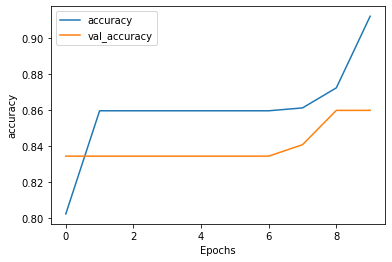

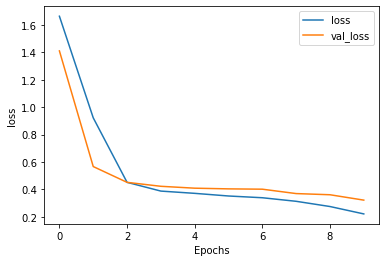

In [27]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


# Saving Embeddings into Files 

In [28]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [29]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 100)


In [30]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

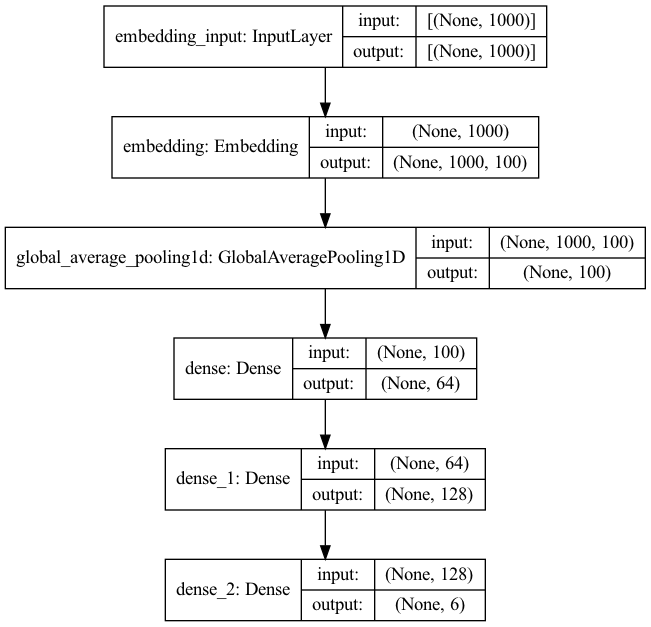

In [32]:
tf.keras.utils.plot_model(model,show_shapes=True, show_layer_names=True)